## 5.3 Gradient Descent

실제값을 y = 4x + 6을 근사하기위한 100개의 데이터셋을 만들고 경사하강법을 이용해 회귀계수 w_0, w_1을 도출하는 실습

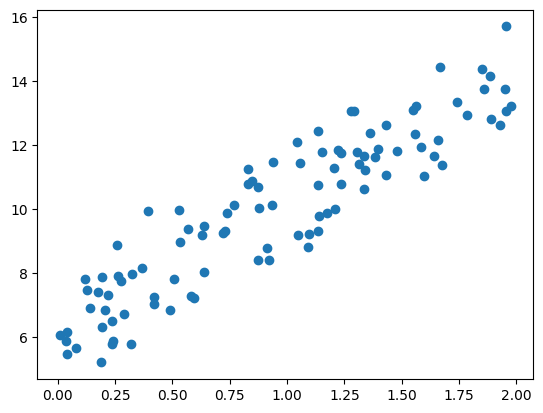

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y=4x + 6(w_1=4, w_0=6)을 근사. 임의값은 노이즈를 위해 만들었다.

X = 2 * np.random.rand(100,1)
y= 6 + 4*X + np.random.randn(100,1) 
# randn(100,1)은 정규분포를 만족하는 숫자 1개를 가진 array를 100개 생성하라는 의미

plt.scatter(X, y)


In [20]:
X.shape, y.shape

((100, 1), (100, 1))

In [21]:
# w1, w0를 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    # w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열을 계산하고 예측과 실제값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1, w0을 업데이트할 w1_update, w0_update계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [22]:
# 경사하강방식으로 반복적으로 수행하여 w1, w0를 업데이트 하는 함수 생성

def gradient_descent_steps(X, y, iters=10000):
    # w0, w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates()를 호출해 w0, w1 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

        return w1, w0

In [23]:
# 예측 오차비용을 계산을 수행하는 함수 생성 및 경사하강법 수행
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:0.215 w0:0.199
Gradient Descent Total Cost:97.2970


흠.... w1, w0가 왜이러지....?

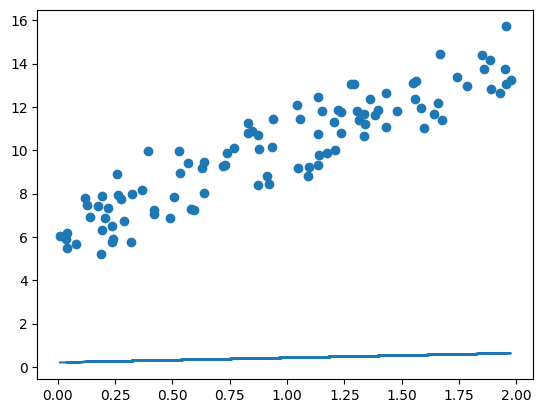

In [24]:
plt.scatter(X, y)
plt.plot(X, y_pred)

회귀선이 왜이럴까..??